Let's start with a model that's very effective at learning Cats v Dogs.

It's similar to the previous models that you have used, but I have updated the layers definition. Note that there are now 4 convolutional layers with 32, 64, 128 and 128 convolutions respectively.

Also, this will train for 100 epochs, because I want to plot the graph of loss and accuracy.

In [1]:
!/miniconda3/envs/tensorflow/bin/wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

local_zip = "/tmp/cats_and_dogs_filtered.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/tmp")
zip_ref.close()

base_dir = "/tmp/cats_and_dogs_filtered"
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, "cats")

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, "dogs")

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, "cats")

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, "dogs")

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2, 2), 
    tf.keras.layers.Conv2D(64, (3, 3), activation = "relu"), 
    tf.keras.layers.MaxPooling2D(2, 2), 
    tf.keras.layers.Conv2D(128, (3, 3), activation = "relu"), 
    tf.keras.layers.MaxPooling2D(2, 2), 
    tf.keras.layers.Conv2D(128, (3, 3), activation = "relu"), 
    tf.keras.layers.MaxPooling2D(2, 2), 
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation = "relu"), 
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model.compile(loss = "binary_crossentropy", 
              optimizer = RMSprop(lr = 1e-4), 
              metrics = ["acc"])

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir, # This is the source directory for training images
        target_size = (150, 150), # All images will be resized to 150x150
        batch_size = 20, 
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode = "binary")

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir, 
        target_size = (150, 150), 
        batch_size = 20, 
        class_mode = "binary")

history = model.fit_generator(
      train_generator, 
      steps_per_epoch = 100, # 2000 images = batch_size * steps
      epochs = 100, 
      validation_data = validation_generator, 
      validation_steps = 50, # 1000 images = batch_size * steps
      verbose = 2)

--2019-09-14 22:02:49--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com... 172.217.6.240
Connecting to storage.googleapis.com|172.217.6.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: '/tmp/cats_and_dogs_filtered.zip'

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  11.9MB/s    in 5.5s    

2019-09-14 22:02:55 (12.0 MB/s) - '/tmp/cats_and_dogs_filtered.zip' saved [68606236/68606236]

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
100/100 - 96s - loss: 0.6911 - acc: 0.5215 - val_loss: 0.6825 - val_acc: 0.5700
Epoch 2/100
100/100 - 131s - loss: 0.6633 - acc: 0.6090 - val_loss: 0.6502 - val_acc: 0.6250
Epoch 3/100
100/100 - 127s - loss: 0.6281 - acc: 0.6530 - val_loss: 0.6407 - val_acc: 0.6160
Epoch 4/100
100/

100/100 - 70s - loss: 0.0065 - acc: 0.9980 - val_loss: 1.8515 - val_acc: 0.7350
Epoch 79/100
100/100 - 71s - loss: 0.0010 - acc: 1.0000 - val_loss: 2.0202 - val_acc: 0.7200
Epoch 80/100
100/100 - 59s - loss: 0.0025 - acc: 0.9990 - val_loss: 1.9673 - val_acc: 0.7300
Epoch 81/100
100/100 - 68s - loss: 5.9746e-04 - acc: 1.0000 - val_loss: 2.3504 - val_acc: 0.7120
Epoch 82/100
100/100 - 70s - loss: 6.8547e-04 - acc: 0.9995 - val_loss: 2.0925 - val_acc: 0.7330
Epoch 83/100
100/100 - 70s - loss: 0.0049 - acc: 0.9980 - val_loss: 2.0950 - val_acc: 0.7260
Epoch 84/100
100/100 - 70s - loss: 0.0018 - acc: 0.9995 - val_loss: 2.1472 - val_acc: 0.7320
Epoch 85/100
100/100 - 70s - loss: 0.0047 - acc: 0.9980 - val_loss: 2.1934 - val_acc: 0.7300
Epoch 86/100
100/100 - 70s - loss: 5.2383e-05 - acc: 1.0000 - val_loss: 2.0897 - val_acc: 0.7310
Epoch 87/100
100/100 - 70s - loss: 0.0174 - acc: 0.9955 - val_loss: 2.0744 - val_acc: 0.7380
Epoch 88/100
100/100 - 71s - loss: 0.0107 - acc: 0.9965 - val_loss: 2.0

In [2]:
import matplotlib.pyplot as plt
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, "bo", label = "Training accuracy")
plt.plot(epochs, val_acc, "b", label = "Validation accuracy")
plt.title("Training and validation accuracy")

plt.figure()

plt.plot(epochs, loss, "bo", label = "Training Loss")
plt.plot(epochs, val_loss, "b", label = "Validation Loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

The Training Accuracy is close to 100%, and the validation accuracy is in the 70%-80% range. This is a great example of overfitting -- which in short means that it can do very well with images it has seen before, but not so well with images it hasn't. Let's see if we can do better to avoid overfitting -- and one simple method is to augment the images a bit. If you think about it, most pictures of a cat are very similar -- the ears are at the top, then the eyes, then the mouth etc. Things like the distance between the eyes and ears will always be quite similar too. 

What if we tweak with the images to change this up a bit -- rotate the image, squash it, etc.  That's what image augementation is all about. And there's an API that makes it easy...

Now take a look at the ImageGenerator. There are properties on it that you can use to augment the image. 

```
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rotation_range = 40, 
      width_shift_range = 0.2, 
      height_shift_range = 0.2, 
      shear_range = 0.2, 
      zoom_range = 0.2, 
      horizontal_flip = True, 
      fill_mode = "nearest")
```
These are just a few of the options available (for more, see the Keras documentation. Let's quickly go over what we just wrote:

* rotation_range is a value in degrees (0–180), a range within which to randomly rotate pictures.
* width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
* shear_range is for randomly applying shearing transformations.
* zoom_range is for randomly zooming inside pictures.
* horizontal_flip is for randomly flipping half of the images horizontally. This is relevant when there are no assumptions of horizontal assymmetry (e.g. real-world pictures).
* fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.


Here's some code where we've added Image Augmentation. Run it to see the impact.


In [3]:
!/miniconda3/envs/tensorflow/bin/wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

local_zip = "/tmp/cats_and_dogs_filtered.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/tmp")
zip_ref.close()

base_dir = "/tmp/cats_and_dogs_filtered"
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, "cats")

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, "dogs")

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, "cats")

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, "dogs")

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2, 2), 
    tf.keras.layers.Conv2D(64, (3, 3), activation = "relu"), 
    tf.keras.layers.MaxPooling2D(2, 2), 
    tf.keras.layers.Conv2D(128, (3, 3), activation = "relu"), 
    tf.keras.layers.MaxPooling2D(2, 2), 
    tf.keras.layers.Conv2D(128, (3, 3), activation = "relu"), 
    tf.keras.layers.MaxPooling2D(2, 2), 
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation = "relu"), 
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model.compile(loss = "binary_crossentropy", 
              optimizer = RMSprop(lr = 1e-4), 
              metrics = ["acc"])

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale = 1./255, 
      rotation_range = 40, 
      width_shift_range = 0.2, 
      height_shift_range = 0.2, 
      shear_range = 0.2, 
      zoom_range = 0.2, 
      horizontal_flip = True, 
      fill_mode = "nearest")

test_datagen = ImageDataGenerator(rescale = 1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir, # This is the source directory for training images
        target_size = (150, 150), # All images will be resized to 150x150
        batch_size = 20, 
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode = "binary")

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir, 
        target_size = (150, 150), 
        batch_size = 20, 
        class_mode = "binary")

history = model.fit_generator(
      train_generator, 
      steps_per_epoch = 100, # 2000 images = batch_size * steps
      epochs = 100, 
      validation_data = validation_generator, 
      validation_steps = 50, # 1000 images = batch_size * steps
      verbose = 2)

--2019-09-15 01:02:16--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com... 172.217.15.112
Connecting to storage.googleapis.com|172.217.15.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: '/tmp/cats_and_dogs_filtered.zip'

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  11.9MB/s    in 5.4s    

2019-09-15 01:02:22 (12.1 MB/s) - '/tmp/cats_and_dogs_filtered.zip' saved [68606236/68606236]

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 - 75s - loss: 0.6903 - acc: 0.5315 - val_loss: 0.6684 - val_acc: 0.6250
Epoch 2/100
100/100 - 73s - loss: 0.6812 - acc: 0.5590 - val_loss: 0.6496 - val_acc: 0.6290
Epoch 3/100
100/100 - 72s - loss: 0.6555 - acc: 0.6050 - val_loss: 0.6535 - val_acc: 0.6090
Epoch 4/100
100/100 - 73s - loss: 0.6433 - acc: 0.6180 - val_loss: 0.6500 - val_acc: 0.5920
Epoch 5/100
100/10

Epoch 83/100
100/100 - 45s - loss: 0.3821 - acc: 0.8310 - val_loss: 0.4295 - val_acc: 0.8060
Epoch 84/100
100/100 - 45s - loss: 0.3726 - acc: 0.8345 - val_loss: 0.4451 - val_acc: 0.7930
Epoch 85/100
100/100 - 45s - loss: 0.3910 - acc: 0.8230 - val_loss: 0.4906 - val_acc: 0.7690
Epoch 86/100
100/100 - 44s - loss: 0.3741 - acc: 0.8330 - val_loss: 0.4050 - val_acc: 0.8150
Epoch 87/100
100/100 - 44s - loss: 0.3744 - acc: 0.8320 - val_loss: 0.4323 - val_acc: 0.8110
Epoch 88/100
100/100 - 44s - loss: 0.3677 - acc: 0.8340 - val_loss: 0.4129 - val_acc: 0.8080
Epoch 89/100
100/100 - 45s - loss: 0.3519 - acc: 0.8380 - val_loss: 0.4179 - val_acc: 0.8120
Epoch 90/100
100/100 - 45s - loss: 0.3785 - acc: 0.8325 - val_loss: 0.4432 - val_acc: 0.8000
Epoch 91/100
100/100 - 45s - loss: 0.3805 - acc: 0.8300 - val_loss: 0.4011 - val_acc: 0.8120
Epoch 92/100
100/100 - 45s - loss: 0.3741 - acc: 0.8310 - val_loss: 0.4281 - val_acc: 0.8100
Epoch 93/100
100/100 - 44s - loss: 0.3556 - acc: 0.8450 - val_loss: 0.

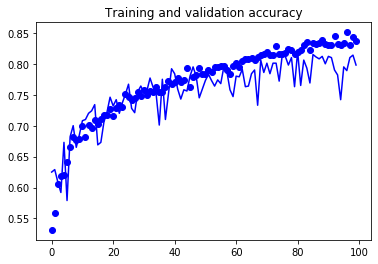

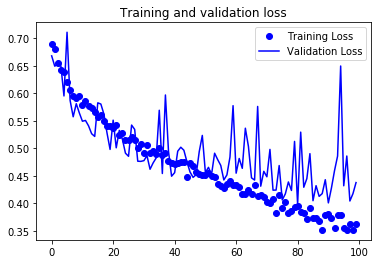

In [4]:
import matplotlib.pyplot as plt
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, "bo", label = "Training accuracy")
plt.plot(epochs, val_acc, "b", label = "Validation accuracy")
plt.title("Training and validation accuracy")

plt.figure()

plt.plot(epochs, loss, "bo", label = "Training Loss")
plt.plot(epochs, val_loss, "b", label = "Validation Loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [5]:
!/miniconda3/envs/tensorflow/bin/wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

local_zip = "/tmp/cats_and_dogs_filtered.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/tmp")
zip_ref.close()

base_dir = "/tmp/cats_and_dogs_filtered"
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, "cats")

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, "dogs")

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, "cats")

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, "dogs")

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2, 2), 
    tf.keras.layers.Conv2D(64, (3, 3), activation = "relu"), 
    tf.keras.layers.MaxPooling2D(2, 2), 
    tf.keras.layers.Conv2D(128, (3, 3), activation = "relu"), 
    tf.keras.layers.MaxPooling2D(2, 2), 
    tf.keras.layers.Conv2D(128, (3, 3), activation = "relu"), 
    tf.keras.layers.MaxPooling2D(2, 2), 
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation = "relu"), 
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model.compile(loss = "binary_crossentropy", 
              optimizer = RMSprop(lr = 1e-4), 
              metrics = ["acc"])

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale = 1./255, 
      rotation_range = 40, 
      width_shift_range = 0.2, 
      height_shift_range = 0.2, 
      shear_range = 0.2, 
      zoom_range = 0.2, 
      horizontal_flip = True, 
      fill_mode = "nearest")

test_datagen = ImageDataGenerator(rescale = 1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir, # This is the source directory for training images
        target_size = (150, 150), # All images will be resized to 150x150
        batch_size = 20, 
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode = "binary")

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir, 
        target_size = (150, 150), 
        batch_size = 20, 
        class_mode = "binary")

history = model.fit_generator(
      train_generator, 
      steps_per_epoch = 100, # 2000 images = batch_size * steps
      epochs = 100, 
      validation_data = validation_generator, 
      validation_steps = 50, # 1000 images = batch_size * steps
      verbose = 2)

--2019-09-15 02:35:42--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com... 172.217.7.208
Connecting to storage.googleapis.com|172.217.7.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: '/tmp/cats_and_dogs_filtered.zip'

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  11.9MB/s    in 5.4s    

2019-09-15 02:35:48 (12.1 MB/s) - '/tmp/cats_and_dogs_filtered.zip' saved [68606236/68606236]

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 - 45s - loss: 0.6931 - acc: 0.5275 - val_loss: 0.6982 - val_acc: 0.5030
Epoch 2/100
100/100 - 44s - loss: 0.6863 - acc: 0.5355 - val_loss: 0.6737 - val_acc: 0.5240
Epoch 3/100
100/100 - 45s - loss: 0.6758 - acc: 0.5710 - val_loss: 0.6467 - val_acc: 0.6170
Epoch 4/100
100/100 - 45s - loss: 0.6592 - acc: 0.6055 - val_loss: 0.6207 - val_acc: 0.6460
Epoch 5/100
100/100 

Epoch 83/100
100/100 - 45s - loss: 0.4187 - acc: 0.8100 - val_loss: 0.4100 - val_acc: 0.8120
Epoch 84/100
100/100 - 45s - loss: 0.4070 - acc: 0.8175 - val_loss: 0.4248 - val_acc: 0.8020
Epoch 85/100
100/100 - 45s - loss: 0.4084 - acc: 0.8115 - val_loss: 0.4125 - val_acc: 0.7980
Epoch 86/100
100/100 - 45s - loss: 0.4157 - acc: 0.8140 - val_loss: 0.4073 - val_acc: 0.8140
Epoch 87/100
100/100 - 45s - loss: 0.3976 - acc: 0.8165 - val_loss: 0.4356 - val_acc: 0.8190
Epoch 88/100
100/100 - 45s - loss: 0.3975 - acc: 0.8175 - val_loss: 0.4329 - val_acc: 0.8010
Epoch 89/100
100/100 - 45s - loss: 0.4058 - acc: 0.8145 - val_loss: 0.4053 - val_acc: 0.8150
Epoch 90/100
100/100 - 45s - loss: 0.3970 - acc: 0.8190 - val_loss: 0.5864 - val_acc: 0.7540
Epoch 91/100
100/100 - 45s - loss: 0.3923 - acc: 0.8205 - val_loss: 0.5285 - val_acc: 0.7740
Epoch 92/100
100/100 - 45s - loss: 0.3965 - acc: 0.8220 - val_loss: 0.5121 - val_acc: 0.7880
Epoch 93/100
100/100 - 45s - loss: 0.4072 - acc: 0.8165 - val_loss: 0.

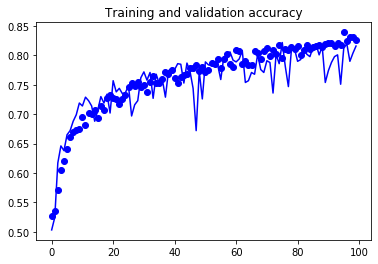

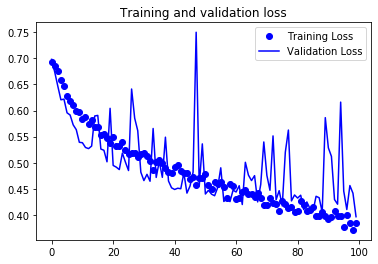

In [6]:
import matplotlib.pyplot as plt
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, "bo", label = "Training accuracy")
plt.plot(epochs, val_acc, "b", label = "Validation accuracy")
plt.title("Training and validation accuracy")

plt.figure()

plt.plot(epochs, loss, "bo", label = "Training Loss")
plt.plot(epochs, val_loss, "b", label = "Validation Loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()